In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

PROC = Path("../data/processed") # where we'll save outputs
OUT_DIR = Path("../data/outputs")

proc_path = PROC / "merged_df_clean.csv"

## Basic Data Cleaning

Load the processed dataset and reorder the columns, keeping only what is necessary.

In [3]:
df = pd.read_csv(proc_path)

df = df[['index', 'weekid', 'week position', 'song', 'performer', 'genre',
         'duration', 'danceability', 'energy', 'loudness',
         'mode', 'speechiness', 'acousticness', 'instrumentalness',
         'valence', 'tempo', 'year', 'decade']]

,index,weekid,week position,song,performer,genre,duration,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,valence,tempo,year,decade
0,964,1958-08-02,2,Patricia,Perez Prado And His Orchestra,"['mambo', 'space age pop']",2.33,0.699,0.715,-5.976,1.0,0.0391,0.180,0.415000,0.810,137.373,1958,1950
1,980,1958-08-02,3,Splish Splash,Bobby Darin,"['adult standards', 'brill building pop', 'eas...",2.20,0.645,0.943,-1.526,1.0,0.0393,0.385,0.000000,0.965,147.768,1958,1950
2,292513,1958-08-02,7,Yakety Yak,The Coasters,"['brill building pop', 'bubblegum pop', 'doo-w...",1.88,0.715,0.669,-9.491,1.0,0.1280,0.705,0.000732,0.976,120.789,1958,1950


## Data Visualization

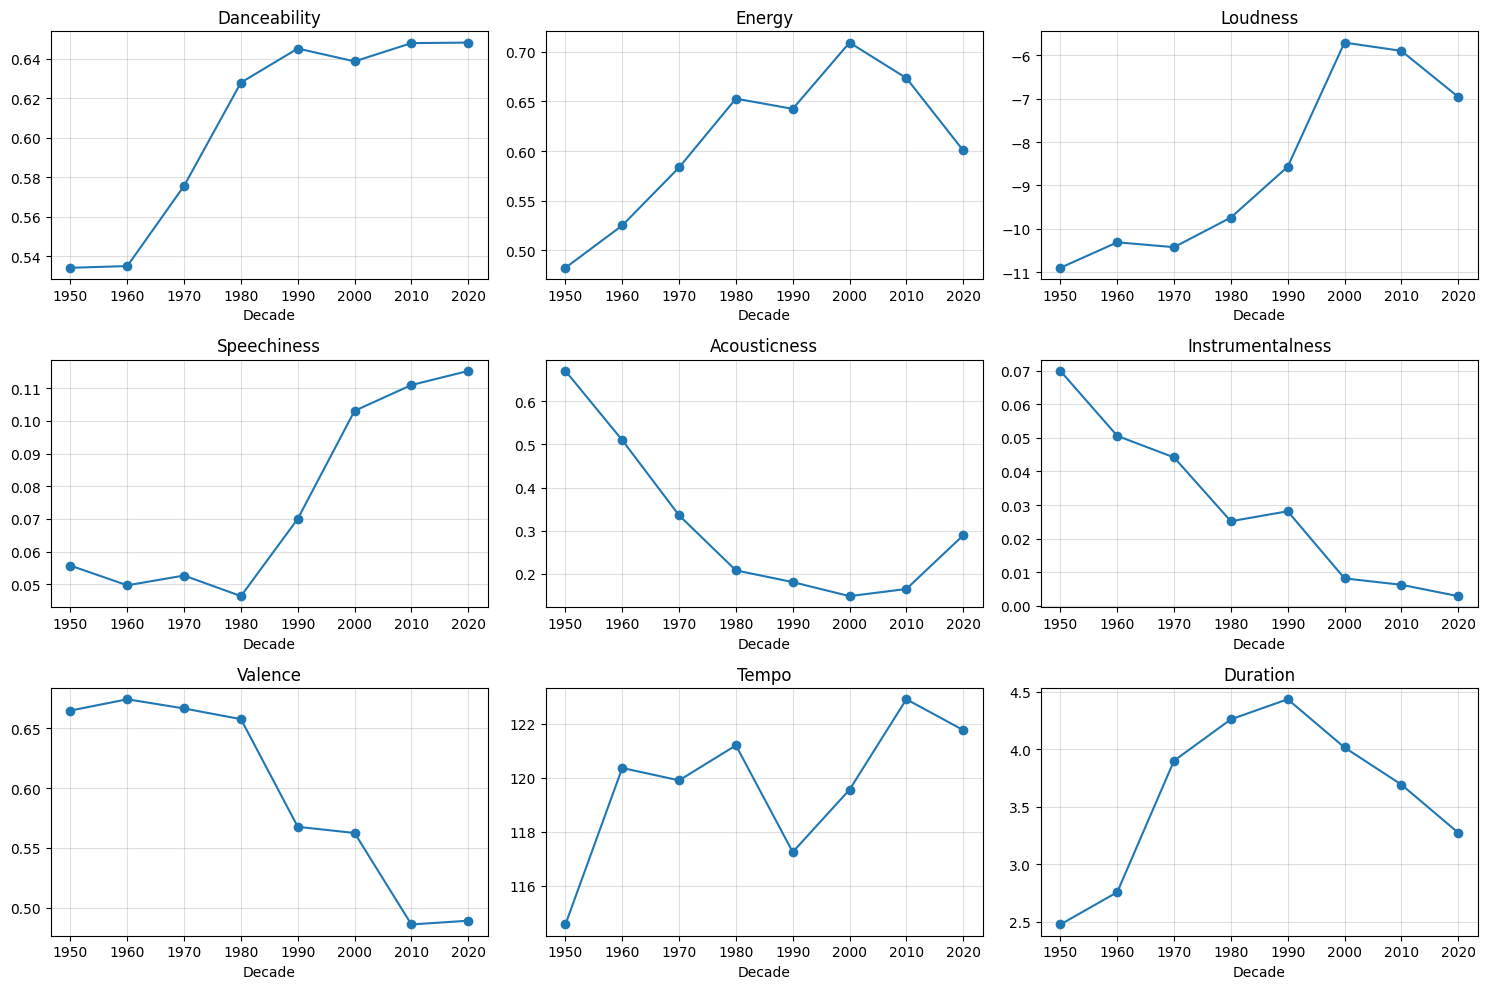

In [11]:
# Select audio features that exist
audio_cols = [
    "danceability", "energy", "loudness", "speechiness",
    "acousticness", "instrumentalness", "liveness",
    "valence", "tempo", "duration"
]
audio_cols = [c for c in audio_cols if c in df.columns]

# Average by decade
decade_audio = (
    df.groupby("decade")[audio_cols]
      .mean()
      .reset_index()
      .sort_values("decade")
)

# Plot all features in 3x4 grid
fig, axes = plt.subplots(3, 3, figsize=(15, 10))
axes = axes.flatten()

for i, feature in enumerate(audio_cols):
    axes[i].plot(decade_audio['decade'], decade_audio[feature], marker='o')
    axes[i].set_title(feature.capitalize())
    axes[i].set_xlabel("Decade")
    axes[i].grid(True, alpha=0.4)
    
plt.tight_layout()
plt.show()


**Observation:** Danceability and energy both rise significantly from the 1970s onward, suggesting that modern hits have become increasingly upbeat and rhythm-driven. Loudness follows a similar trajectory, consistent with the “loudness wars” and the shift toward more compressed, high-volume production styles starting in the 1990s. Meanwhile, acousticness and instrumentalness decline steadily, highlighting a transition from organic, acoustic compositions to digitally produced and vocal-heavy tracks due to technology. Speechiness climbs sharply in recent decades, reflecting the mainstream integration of rap and spoken-word elements. Valence (musical positivity) trends slightly downward since the 2000s, hinting that recent pop music may lean toward more emotionally complex or introspective tones. Tempo and duration show an inverse relationship from the 1990s onwards with tempo increasing and duration decreasing, implying that listener attention spans have compressed.


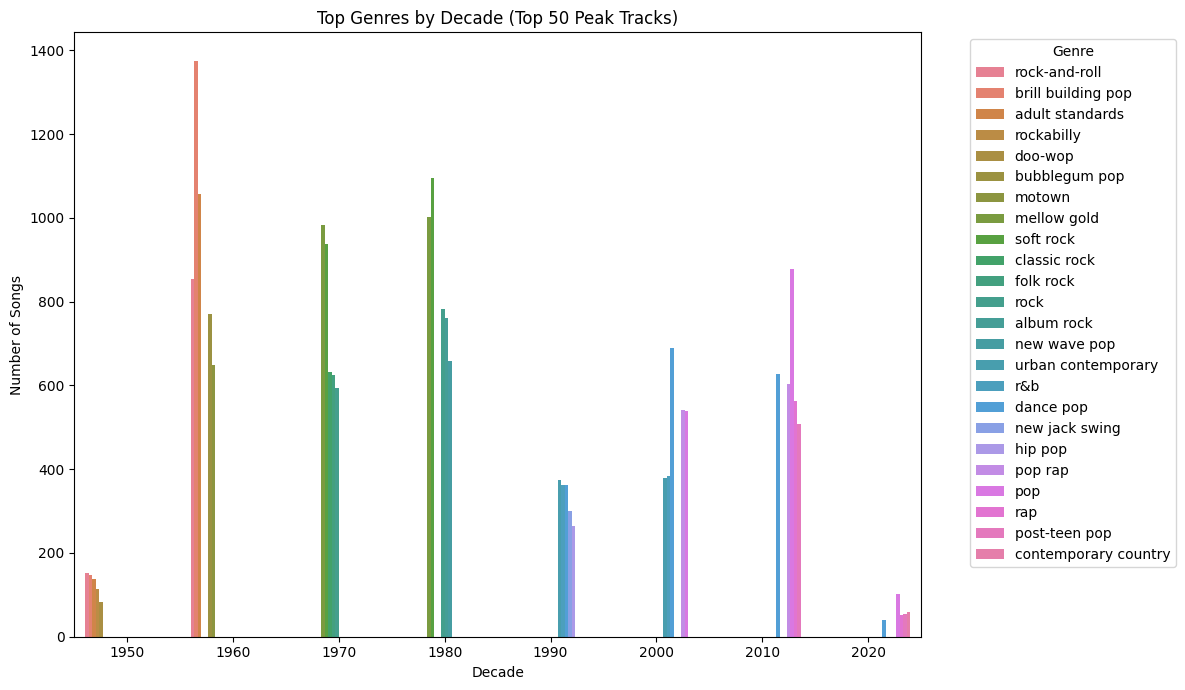

In [12]:
# Clean up the genre column
# (Handles list-like strings or comma-separated text)
df["genre"] = df["genre"].astype(str).str.lower().str.replace("[\[\]']", "", regex=True)
df["genre"] = df["genre"].str.replace(";", ",").str.replace("/", ",")
df["genre_list"] = df["genre"].str.split(",")

# Explode into one genre per row
df_exploded = df.explode("genre_list")
df_exploded["genre_list"] = df_exploded["genre_list"].str.strip()
df_exploded = df_exploded[df_exploded["genre_list"].notna() & (df_exploded["genre_list"] != "")]

# Count frequency by decade + genre
genre_counts = (
    df_exploded.groupby(["decade", "genre_list"])
      .size()
      .reset_index(name="count")
)

# Identify top 8 genres per decade
top_genres = (
    genre_counts.sort_values(["decade", "count"], ascending=[True, False])
    .groupby("decade")
    .head(5)
)

# Plot: stacked bar of genre distribution by decade
plt.figure(figsize=(12, 7))
sns.barplot(
    data=top_genres,
    x="decade",
    y="count",
    hue="genre_list",
)
plt.title("Top Genres by Decade (Top 50 Peak Tracks)")
plt.xlabel("Decade")
plt.ylabel("Number of Songs")
plt.legend(title="Genre", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

**Observation:** Listener preferences have evolved from rock and soulful pop in the mid-20th century toward beat-centric, electronically produced genres in recent decades. The 1950s and 1960s were dominated by rock-and-roll, Motown, and brill building pop, reflecting the rise of mass youth culture and polished studio production. The 1970s emphasized classic and album rock as listeners sought more depth and authenticity, while the 1980s shifted toward danceable, synth-heavy pop and R&B. From the 1990s onward, hip-hop and pop-rap became dominant, mirroring urban and digital influences, and by the 2000s–2010s, most chart-topping songs converged around pop, dance pop, and rap hybrids. Overall, listener preferences have trended toward rhythm and energy, aligning with the findings of audio features above, with genre boundaries becoming increasingly blurred in the streaming era.

/var/folders/sn/6wy7nv4x5_xbhyzbnqlbmm_00000gn/T/ipykernel_6871/611748463.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/sn/6wy7nv4x5_xbhyzbnqlbmm_00000gn/T/ipykernel_6871/611748463.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/sn/6wy7nv4x5_xbhyzbnqlbmm_00000gn/T/ipykernel_6871/611748463.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/sn/6wy7nv4x5_xbhyzbnqlbmm_00000gn/T/ipykernel_6871/611748463.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will 

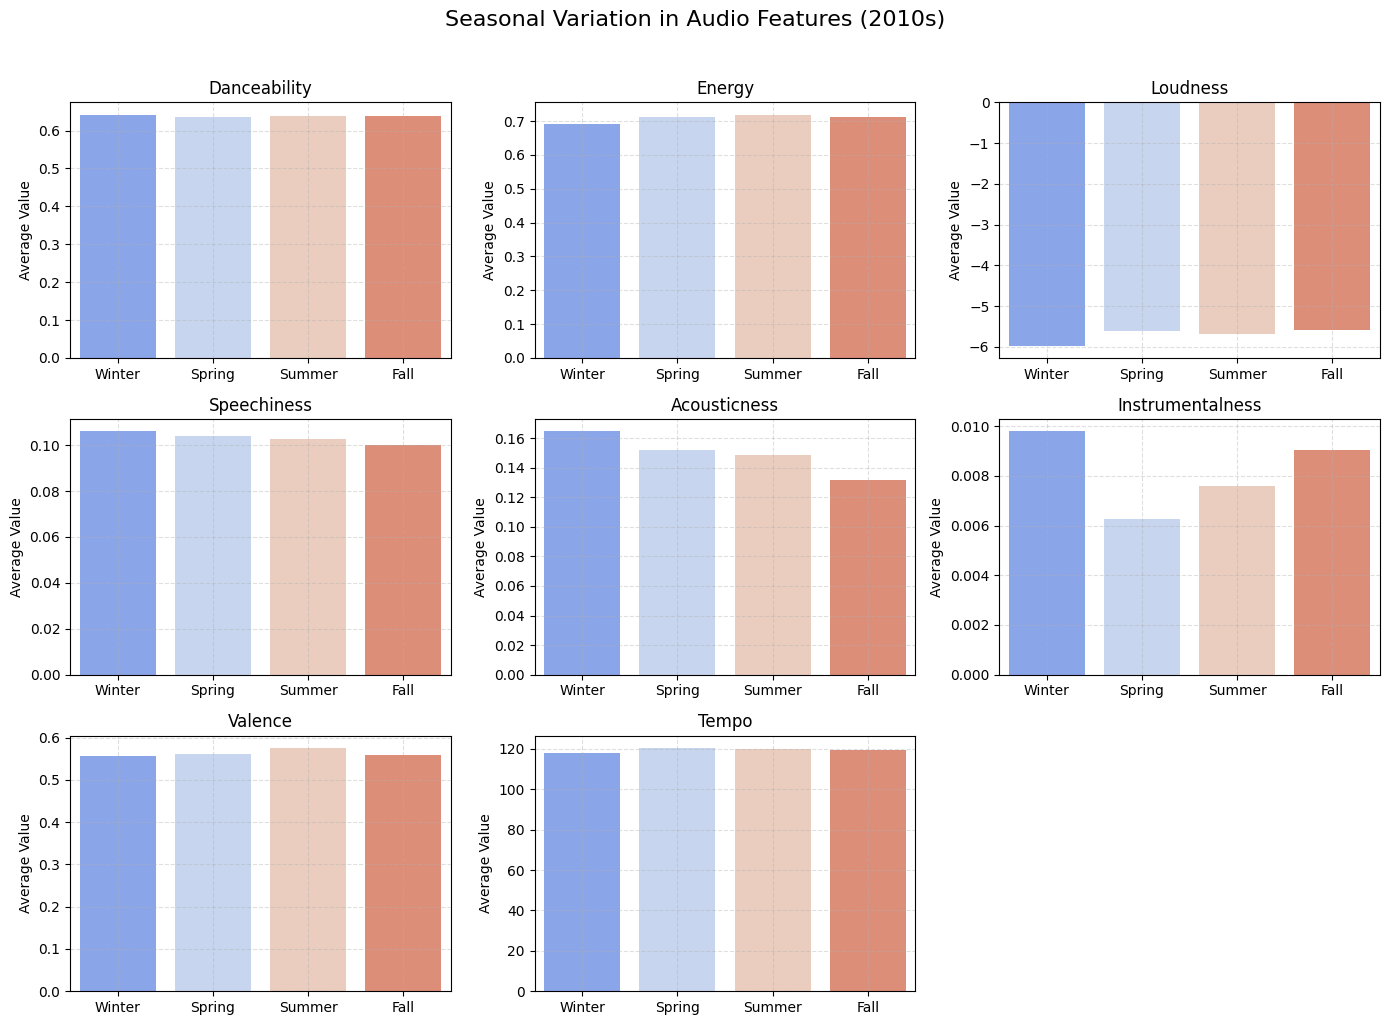

instrumentalness    43.250980
acousticness        22.305306
speechiness          5.975757
energy               4.086627
valence              3.640055
tempo                2.150969
danceability         1.120834
loudness            -6.606569
dtype: float64

In [13]:
df["weekid"] = pd.to_datetime(df["weekid"])
df["month"] = df["weekid"].dt.month

# --- Choose a decade (e.g., 2010s only) ---
df_decade = df[(df["year"] >= 2000) & (df["year"] < 2010)].copy()

# --- Map months to seasons ---
def get_season(month):
    if month in [12, 1, 2]:
        return "Winter"
    elif month in [3, 4, 5]:
        return "Spring"
    elif month in [6, 7, 8]:
        return "Summer"
    else:
        return "Fall"

df_decade["season"] = df_decade["month"].apply(get_season)

# --- Audio features to analyze ---
audio_cols = [
    "danceability", "energy", "loudness", "speechiness",
    "acousticness", "instrumentalness", "liveness",
    "valence", "tempo"
]
audio_cols = [c for c in audio_cols if c in df.columns]

# --- Compute averages by season ---
season_audio = (
    df_decade.groupby("season")[audio_cols]
    .mean()
    .reindex(["Winter", "Spring", "Summer", "Fall"])
)

# --- Plot as radar chart style grid ---
fig, axes = plt.subplots(3, 3, figsize=(14, 10))
axes = axes.flatten()

for i, feature in enumerate(audio_cols):
    sns.barplot(
        x=season_audio.index,
        y=season_audio[feature].values,
        palette="coolwarm",
        ax=axes[i]
    )
    axes[i].set_title(feature.capitalize())
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Average Value")
    axes[i].grid(True, linestyle="--", alpha=0.4)

for j in range(len(audio_cols), len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Seasonal Variation in Audio Features (2010s)", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

season_range = (season_audio.max() - season_audio.min()) / season_audio.mean() * 100
season_range.sort_values(ascending=False)


**Observation:** Across seasons in the 2010s, listener preferences showed only minor variation, confirming that seasonal changes don’t strongly shape what becomes popular. The most noticeable shifts were in instrumentalness (+43%) and acousticness (+22%), suggesting that slightly more stripped-down or acoustic tracks gain traction in certain parts of the year (winter or fall). Meanwhile, expressive features like energy, valence, and danceability fluctuated less than 5%, indicating that the emotional tone and rhythm of top songs remain largely consistent year-round. The small negative swing in loudness (~−7%) reinforces this stability: production intensity stays nearly constant regardless of season. Overall, the data imply that long-term cultural and production trends outweigh short-term seasonal effects in influencing listener preferences.

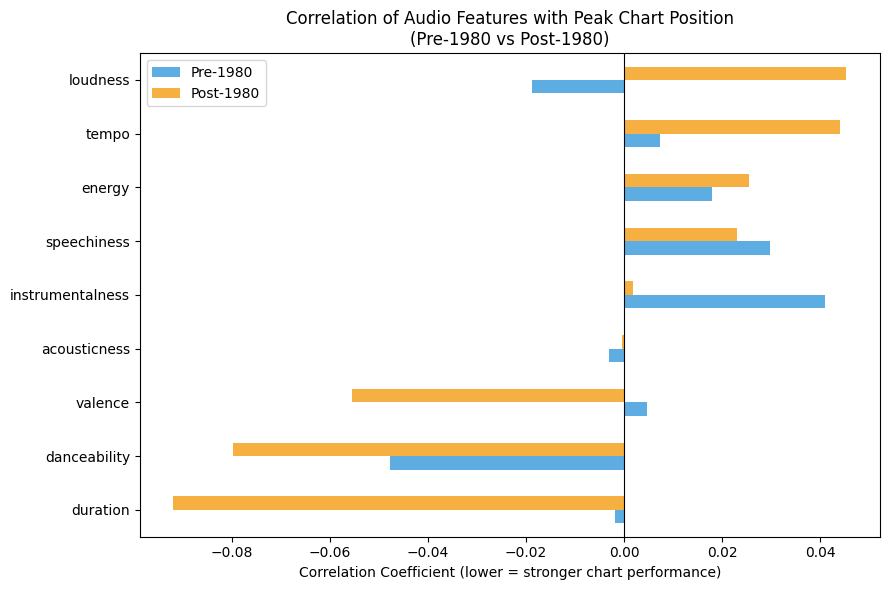

,Pre-1980,Post-1980
duration,-0.001919,-0.091847
danceability,-0.047719,-0.079719
valence,0.004690,-0.055441
acousticness,-0.003061,-0.000351
instrumentalness,0.040978,0.001906
speechiness,0.029803,0.023115
energy,0.017900,0.025380
tempo,0.007345,0.044098
loudness,-0.018705,0.045314


In [17]:
# Split into eras
pre_1980 = df[df["year"] < 1980].copy()
post_1980 = df[df["year"] >= 1980].copy()

# Audio feature columns
audio_cols = [
    "danceability", "energy", "loudness", "speechiness",
    "acousticness", "instrumentalness", "liveness",
    "valence", "tempo", "duration"
]
audio_cols = [c for c in audio_cols if c in df.columns]

# Drop NaNs
pre_1980 = pre_1980.dropna(subset=audio_cols + ["week position"])
post_1980 = post_1980.dropna(subset=audio_cols + ["week position"])

# Compute correlations for each era (exclude 'week position' itself)
corr_pre = pre_1980[audio_cols + ["week position"]].corr()["week position"].drop("week position")
corr_post = post_1980[audio_cols + ["week position"]].corr()["week position"].drop("week position")

# Combine into one DataFrame for comparison
corr_compare = pd.DataFrame({
    "Pre-1980": corr_pre,
    "Post-1980": corr_post
}).sort_values("Post-1980")

# Plot side-by-side bar chart
corr_compare.plot(kind="barh", figsize=(9,6), color=["#5DADE2", "#F5B041"])
plt.title("Correlation of Audio Features with Peak Chart Position\n(Pre-1980 vs Post-1980)")
plt.xlabel("Correlation Coefficient (lower = stronger chart performance)")
plt.axvline(0, color="black", linewidth=0.8)
plt.tight_layout()
plt.show()

corr_compare

**Observation:** Before 1980, chart performance was only weakly linked to measurable production traits, reflecting an era defined more by composition, performance, and cultural movements than by standardized sound. Danceability showed a mild negative correlation with chart position, suggesting that rhythmically engaging songs had a slight edge, but traits like energy, valence, and loudness had little to no predictive value. Instrumentalness was slightly positive, meaning instrumental-heavy or less vocal-centric songs generally performed worse. This era’s hits were shaped by live instrumentation, organic sound, and songwriting rather than by the production-driven polish seen in later decades.

After 1980, the relationship between audio features and chart success became much clearer, showing a shift toward rhythmic accessibility and radio-friendly structure. Danceability and duration became strong predictors of performance — shorter, more upbeat, and highly rhythmic tracks dominated as disco, pop, and later electronic influences rose. Valence also turned more negative, implying that happier, major-key songs became more commercially viable. The influence of digital production and the standardization of loudness, rhythm, and structure meant that listener preferences converged around consistent sonic profiles, marking the transition to a production-optimized pop landscape.

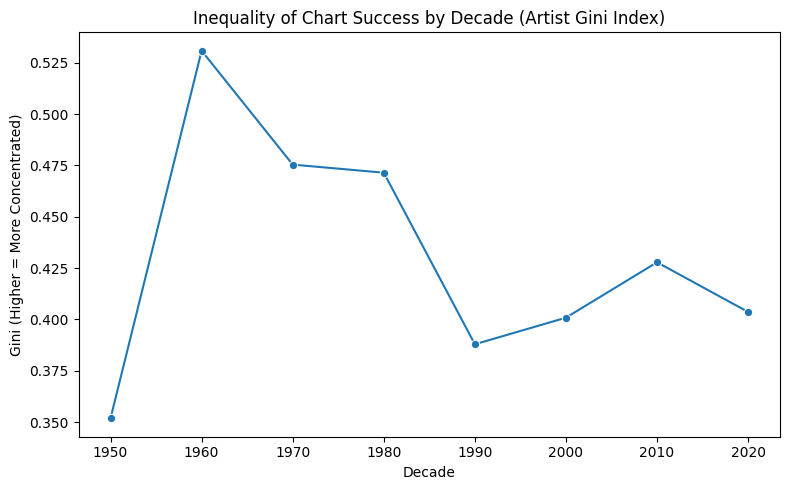

,decade,gini_index
0,1950,0.351814
1,1960,0.530849
2,1970,0.475389
3,1980,0.471441
4,1990,0.387885
5,2000,0.400835
6,2010,0.427814
7,2020,0.403624


In [20]:
from scipy.stats import rankdata
import numpy as np

# Compute number of songs per artist per decade
artist_counts = df.groupby(["decade", "performer"])["song"].count().reset_index(name="count")

# Compute Gini index per decade
def gini(array):
    array = np.sort(array)
    n = len(array)
    cumulative = np.cumsum(array)
    return (n + 1 - 2 * np.sum(cumulative) / cumulative[-1]) / n

gini_df = artist_counts.groupby("decade")["count"].apply(gini).reset_index(name="gini_index")

# Plot
plt.figure(figsize=(8,5))
sns.lineplot(data=gini_df, x="decade", y="gini_index", marker="o")
plt.title("Inequality of Chart Success by Decade (Artist Gini Index)")
plt.xlabel("Decade")
plt.ylabel("Gini (Higher = More Concentrated)")
plt.tight_layout()
plt.show()

gini_df


**Observation:** The Gini index shows that chart success was highly concentrated before the 1980s, with a few dominant artists accounting for most hits, particularly in the 1960s when industry gatekeeping and limited radio exposure centered listener attention on major stars. After 1980, the index declined and stabilized, indicating a steady broadening of who could achieve mainstream success. This reflects the impact of MTV, digital distribution, and eventually streaming - each expanding access and letting more artists reach listeners. While the 2010s saw a slight uptick in concentration which could be attribued to algorithmic promotion of superstars, the overall trend shows that listener preferences have become more distributed and diverse, with audiences engaging across a wider range of artists than in earlier decades.